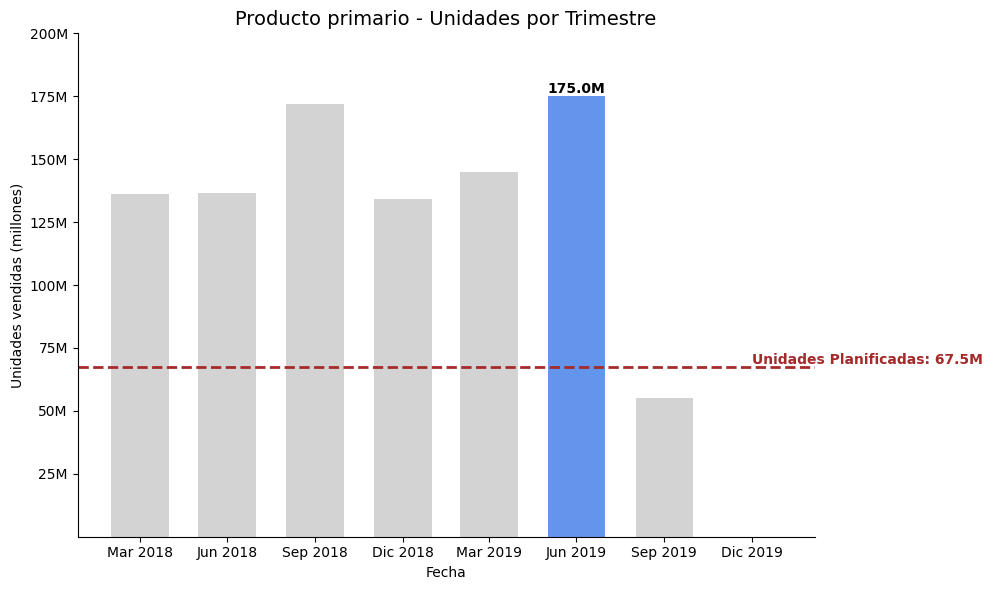

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Abrir el archivo CSV
data = pd.read_csv('data/depuracion.csv')

# Cargar el archivo CSV (asegúrate de que esté en el directorio adecuado)
data = pd.read_csv('data/depuracion.csv')

# Formatear fechas y agrupar por trimestre
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%b-%y')
data = data.set_index('Fecha').resample('Q').sum().reset_index()

# Función para formatear fechas en español
def format_date_to_spanish(date):
    months = ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
              "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
    return f"{months[date.month - 1]} {date.year}"

# Obtener las fechas y valores de las barras más alta y más baja
max_value = data['Ventas Reales (unidades)'].max()
min_value = data['Ventas Reales (unidades)'].min()
max_date = data.loc[data['Ventas Reales (unidades)'].idxmax(), 'Fecha']
min_date = data.loc[data['Ventas Reales (unidades)'].idxmin(), 'Fecha']

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras de Ventas Reales con colores condicionales
for i, row in data.iterrows():
    color = 'cornflowerblue' if row['Fecha'] in [max_date, min_date] else 'lightgray'
    ax.bar(row['Fecha'], row['Ventas Reales (unidades)'], color=color, width=60)

# Añadir etiquetas solo para los valores máximo y mínimo
ax.text(max_date, max_value, f'{max_value / 1_000_000:.1f}M', ha='center', va='bottom',
        fontsize=10, color='black', weight='bold')

# Graficar la línea de Ventas Planificadas (una sola línea recta)
average_plan = data['Ventas planificadas (unidades)'].mean()
ax.axhline(y=average_plan, color='brown', linestyle='--', linewidth=2)

# Añadir etiqueta para "Unidades Planificadas" junto a la línea punteada con el valor
ax.text(data['Fecha'].iloc[-1], average_plan, f'Unidades Planificadas: {average_plan / 1_000_000:.1f}M',
        color='brown', ha='left', va='bottom', fontsize=10, weight='bold')

# Configurar etiquetas del eje Y en millones
yticks = ax.get_yticks()
yticks = yticks[yticks > 0]  # Eliminar el valor 0
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(x / 1_000_000):,}M' for x in yticks])

# Configurar título y etiquetas
ax.set_title('Producto primario - Unidades por Trimestre', fontsize=14)
ax.set_ylabel('Unidades vendidas (millones)')
ax.set_xlabel('Fecha')

# Formato de fechas en el eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xticks(data['Fecha'])
ax.set_xticklabels([format_date_to_spanish(date) for date in data['Fecha']], rotation=0, ha='center')

# Eliminar los bordes superior y derecho para simplificar la visualización
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
